In [5]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

In [6]:
df = pd.read_excel("premiums.xlsx")
df.head(3)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164


In [7]:
df = pd.read_excel("premiums.xlsx")
df.head(3)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164


In [8]:
df.shape

(50000, 13)

In [10]:
df.columns.str.replace(' ', '_').str.lower()
df.head(1)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053


In [11]:
df.isna().sum()

Age                       0
Gender                    0
Region                    0
Marital_status            0
Number Of Dependants      0
BMI_Category              0
Smoking_Status           11
Employment_Status         2
Income_Level             13
Income_Lakhs              0
Medical History           0
Insurance_Plan            0
Annual_Premium_Amount     0
dtype: int64

In [12]:
df.dropna()

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,24,Female,Northwest,Unmarried,0,Underweight,No Smoking,Self-Employed,25L - 40L,35,No Disease,Bronze,9111
49996,47,Female,Southeast,Married,2,Normal,No Smoking,Salaried,> 40L,82,Thyroid,Gold,27076
49997,21,Male,Northwest,Unmarried,0,Normal,Regular,Freelancer,25L - 40L,32,No Disease,Bronze,8564
49998,18,Male,Northwest,Unmarried,2,Normal,No Smoking,Salaried,10L - 25L,20,No Disease,Bronze,9490


In [13]:
df.dropna(inplace=True)
df.isna().sum()

Age                      0
Gender                   0
Region                   0
Marital_status           0
Number Of Dependants     0
BMI_Category             0
Smoking_Status           0
Employment_Status        0
Income_Level             0
Income_Lakhs             0
Medical History          0
Insurance_Plan           0
Annual_Premium_Amount    0
dtype: int64

In [14]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [15]:
df.describe()

,Age,Number Of Dependants,Income_Lakhs,Annual_Premium_Amount
count,49976.000000,49976.000000,49976.000000,49976.000000
mean,34.591764,1.711842,23.021150,15766.810189
std,15.000378,1.498195,24.221794,8419.995271
min,18.000000,-3.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8607.750000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22273.500000
max,356.000000,5.000000,930.000000,43471.000000


In [16]:
df[df.number_of_dependents<0]['number_of_dependents'].unique()

AttributeError: 'DataFrame' object has no attribute 'number_of_dependents'

In [18]:
df['number_of_dependants'] = abs(df['number_of_dependants']) 
df['number_of_dependants'].describe()

KeyError: 'number_of_dependants'

In [19]:
df[df.number_of_dependants<0]['number_of_dependants'].unique()

AttributeError: 'DataFrame' object has no attribute 'number_of_dependants'

In [24]:
df[df.Number Of Dependants<0]['Number Of Dependants'].unique()

SyntaxError: invalid syntax (2428589261.py, line 1)

In [28]:
import pandas as pd

# Rename a single column
df = df.rename(columns={'number_of_dependatns': 'number_of_dependants'})
print(df)

       Age  Gender     Region Marital_status  number_of_dependants  \
0       26    Male  Northwest      Unmarried                     0   
1       29  Female  Southeast        Married                     2   
2       49  Female  Northeast        Married                     2   
3       30  Female  Southeast        Married                     3   
4       18    Male  Northeast      Unmarried                     0   
...    ...     ...        ...            ...                   ...   
49995   24  Female  Northwest      Unmarried                     0   
49996   47  Female  Southeast        Married                     2   
49997   21    Male  Northwest      Unmarried                     0   
49998   18    Male  Northwest      Unmarried                     2   
49999   48  Female  Southwest        Married                     3   

      BMI_Category Smoking_Status Employment_Status Income_Level  \
0           Normal     No Smoking          Salaried         <10L   
1          Obesity     

In [29]:
df.describe()

,Age,number_of_dependants,Income_Lakhs,Annual_Premium_Amount
count,49976.000000,49976.000000,49976.000000,49976.000000
mean,34.591764,1.711842,23.021150,15766.810189
std,15.000378,1.498195,24.221794,8419.995271
min,18.000000,-3.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8607.750000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22273.500000
max,356.000000,5.000000,930.000000,43471.000000


In [30]:
df[df.number_of_dependants<0]['number_of_dependants'].unique()

array([-3, -1], dtype=int64)

In [31]:
df['number_of_dependants'] = abs(df['number_of_dependants'])
df['number_of_dependants'].describe()

count    49976.000000
mean         1.717284
std          1.491953
min          0.000000
25%          0.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: number_of_dependants, dtype: float64

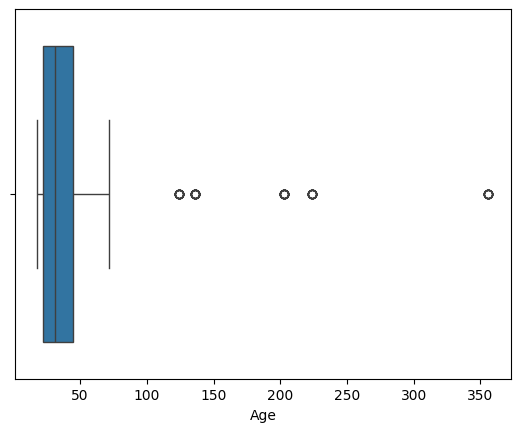

In [33]:
sns.boxplot(x=df['Age'])
plt.show()

In [35]:
numeric_columns=df.select_dtypes(['float64','int64']).columns
numeric_columns

Index(['Age', 'number_of_dependants', 'Income_Lakhs', 'Annual_Premium_Amount'], dtype='object')

In [38]:
df[df.Age>100]['Age'].unique()

array([224, 124, 136, 203, 356], dtype=int64)

In [41]:
df1  = df[df.Age<=100].copy()
df1.describe()

,Age,number_of_dependants,Income_Lakhs,Annual_Premium_Amount
count,49918.000000,49918.000000,49918.000000,49918.000000
mean,34.401839,1.717617,23.025141,15766.589286
std,13.681600,1.492074,24.227912,8419.137327
min,18.000000,0.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8608.000000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22272.000000
max,72.000000,5.000000,930.000000,43471.000000


<Axes: xlabel='Income_Lakhs', ylabel='Count'>

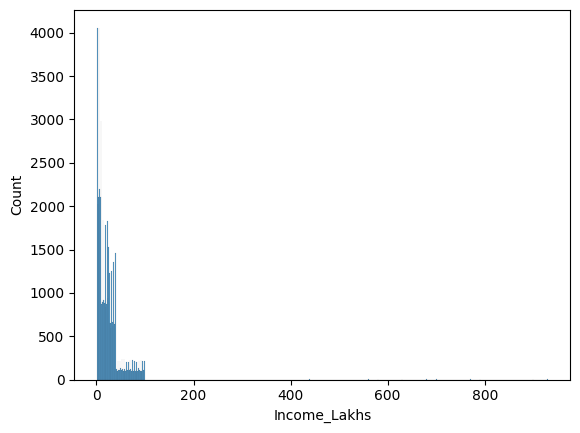

In [45]:
sns.histplot(df1.Income_Lakhs)

In [47]:
df.Income_Lakhs.quantile([0.25, 0.75])

0.25     7.0
0.75    31.0
Name: Income_Lakhs, dtype: float64

In [48]:
def get_iqr_bounds(col):
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

In [49]:
get_iqr_bounds(df1.Income_Lakhs)

(-29.0, 67.0)

In [51]:
quantile_threshold = df['Income_lakhs'].quantile(0.999)
quantile_threshold

KeyError: 'Income_lakhs'

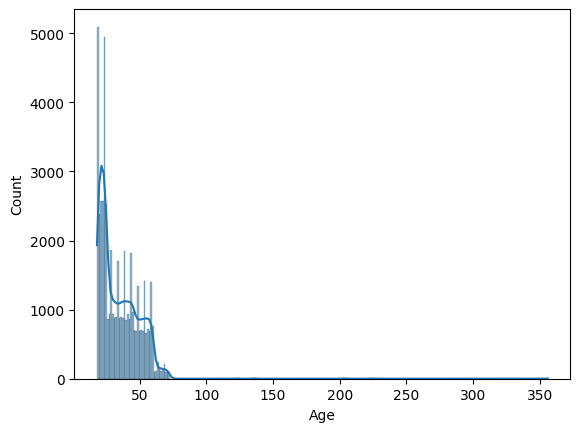

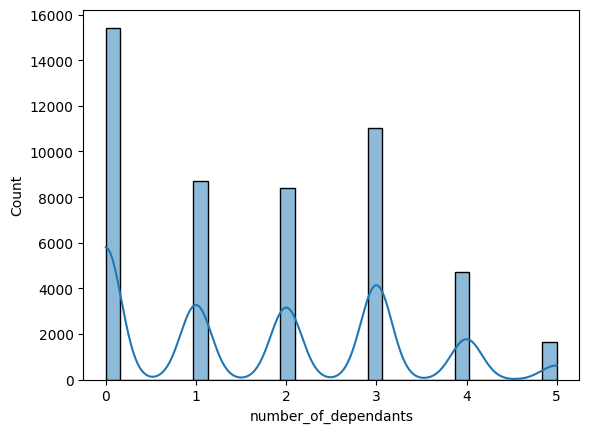

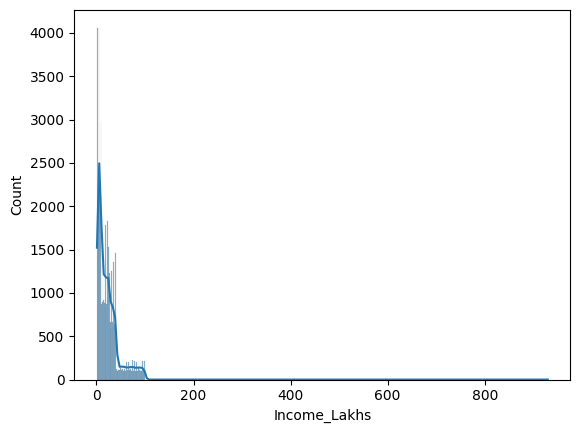

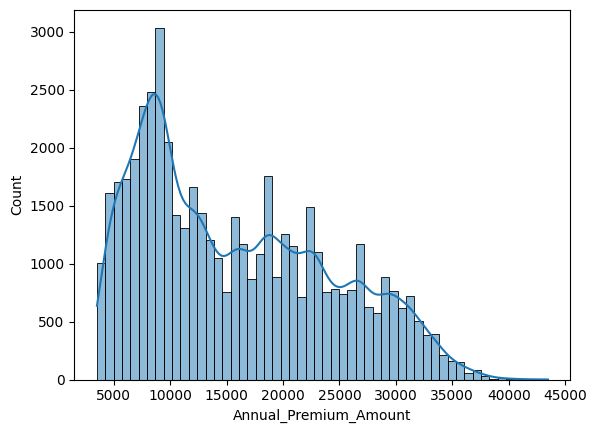

In [52]:
for col in numeric_columns:
    sns.histplot(df[col], kde=True)
    plt.show()

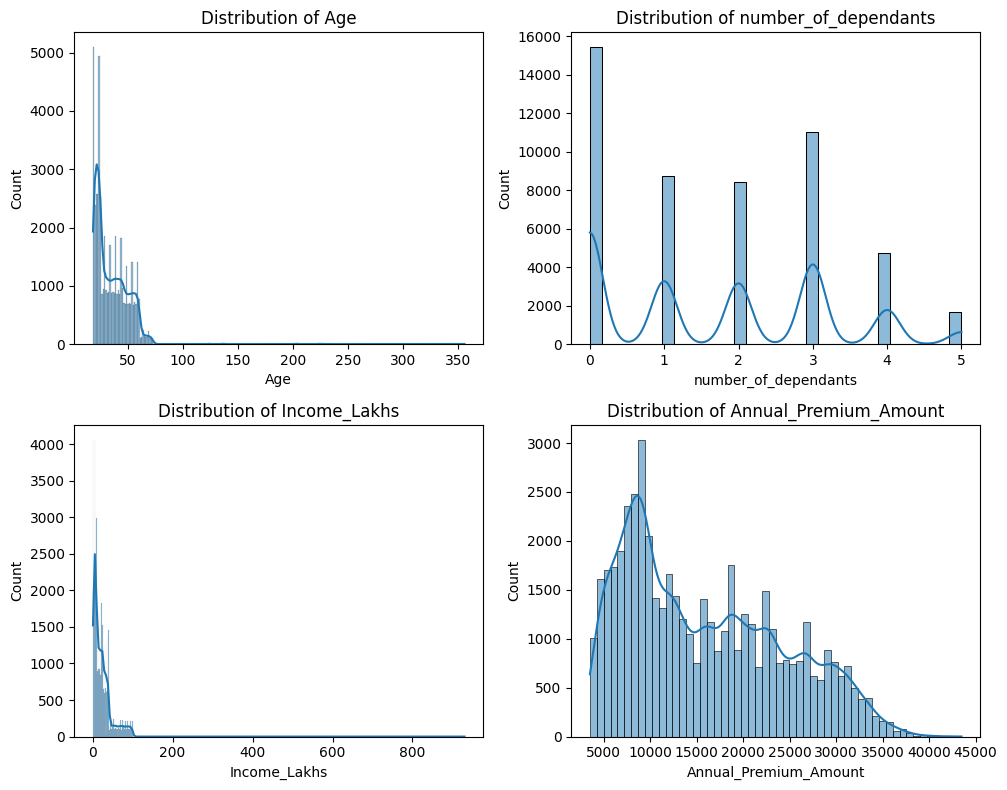

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming numeric_columns is a list of the column names you want to plot
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # 2 rows, 2 columns

# Flatten the axes for easy iteration
axes = axes.flatten()

# Loop through the numeric columns and plot on the respective axes
for i, col in enumerate(numeric_columns[:4]):  # Ensure there are at least 4 columns
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()  # Adjust the spacing between plots
plt.show()

In [55]:
sns.scatterplot(df, x='Age', y='annual_premium_amount')

ValueError: Could not interpret value `annual_premium_amount` for `y`. An entry with this name does not appear in `data`.

In [56]:
sns.scatterplot(df2, x='age', y='annual_premium_amount')

NameError: name 'df2' is not defined

In [ ]:
import pandas as pd

# Example: Loading a CSV file into df2
df2 = pd.read_excel('premiums.xlsx')
import seaborn as sns

# Now the scatter plot will work
sns.scatterplot(data=df2, x='age', y='annual_premium_amount')

In [ ]:
import pandas as pd

# Example: Loading a CSV file into df2
df2 = pd.read_excel('premiums.xlsx')
import seaborn as sns

# Now the scatter plot will work
sns.scatterplot(data=df2, x='age', y='annual_premium_amount')

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Now the scatter plot will work if the column names match
sns.scatterplot(data=df2, x='age', y='annual_premium_amount')

# Show the plot
plt.show()

ValueError: Could not interpret value `age` for `x`. An entry with this name does not appear in `data`.

In [61]:
import pandas as pd

# Loading the Excel file into df2
df2 = pd.read_excel('premiums.xlsx')

# Check if the data is loaded properly
print(df2.head())  # This will display the first 5 rows of the DataFrame
print(df2.columns)  # This will show the column names

   Age  Gender     Region Marital_status  Number Of Dependants BMI_Category  \
0   26    Male  Northwest      Unmarried                     0       Normal   
1   29  Female  Southeast        Married                     2      Obesity   
2   49  Female  Northeast        Married                     2       Normal   
3   30  Female  Southeast        Married                     3       Normal   
4   18    Male  Northeast      Unmarried                     0   Overweight   

  Smoking_Status Employment_Status Income_Level  Income_Lakhs  \
0     No Smoking          Salaried         <10L             6   
1        Regular          Salaried         <10L             6   
2     No Smoking     Self-Employed    10L - 25L            20   
3     No Smoking          Salaried        > 40L            77   
4        Regular     Self-Employed        > 40L            99   

       Medical History Insurance_Plan  Annual_Premium_Amount  
0             Diabetes         Bronze                   9053  
1       

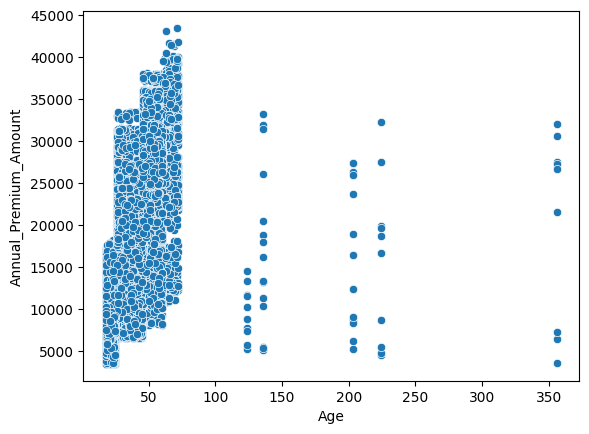

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Now the scatter plot will work if the column names match
sns.scatterplot(data=df2, x='Age', y='Annual_Premium_Amount')

# Show the plot
plt.show()

In [68]:
df2['Smoking_Status'].replace({
    'Smoking=0' : 'No Smoking', 
    'Does Not Smoke': 'No Smoking',
    'Not Smoking': 'No Smoking'
}, inplace=True) 
df2[Smoking_Status].unique()

NameError: name 'Smoking_Status' is not defined

In [71]:
pct_count = df2['Gender'].value_counts(normalize=True)
pct_count

Gender
Male      0.5496
Female    0.4504
Name: proportion, dtype: float64

In [72]:
pct_count.index

Index(['Male', 'Female'], dtype='object', name='Gender')

<Axes: xlabel='Gender'>

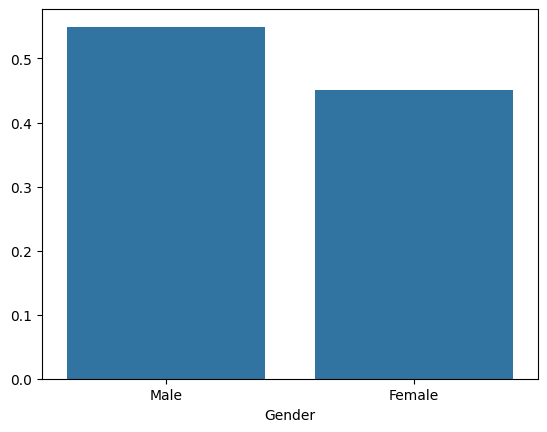

In [73]:
sns.barplot(x=pct_count.index, y=pct_count.values)

Insurance_Plan  Bronze  Gold  Silver
Income_Level                        
10L - 25L         5315  3886    5190
25L - 40L         3686  2849    3753
<10L             12240   931    5496
> 40L              330  3663    2648


<Axes: xlabel='Income_Level'>

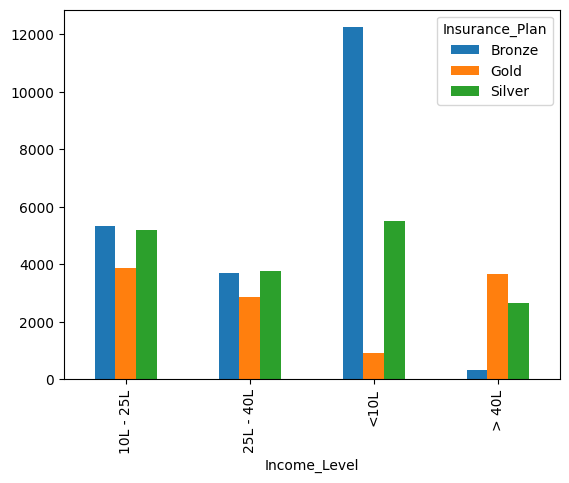

In [74]:
crosstab = pd.crosstab(df2['Income_Level'], df2['Insurance_Plan'])
print(crosstab)

crosstab.plot(kind="bar")

In [78]:
crosstab = pd.crosstab(df2['Income_Level', df2['Insurance_Plan']]) 
print(crosstab)

crosstab.plot(kind="bar", stacked=True)
plt.title('Income Vs Plan')
plt.ylabel('Count')
plt.show()

InvalidIndexError: ('Income_Level', 0        Bronze
1        Bronze
2        Silver
3          Gold
4        Silver
          ...  
49995    Bronze
49996      Gold
49997    Bronze
49998    Bronze
49999    Silver
Name: Insurance_Plan, Length: 50000, dtype: object)

Insurance_Plan  Bronze  Gold  Silver
Income_Level                        
10L - 25L         5315  3886    5190
25L - 40L         3686  2849    3753
<10L             12240   931    5496
> 40L              330  3663    2648


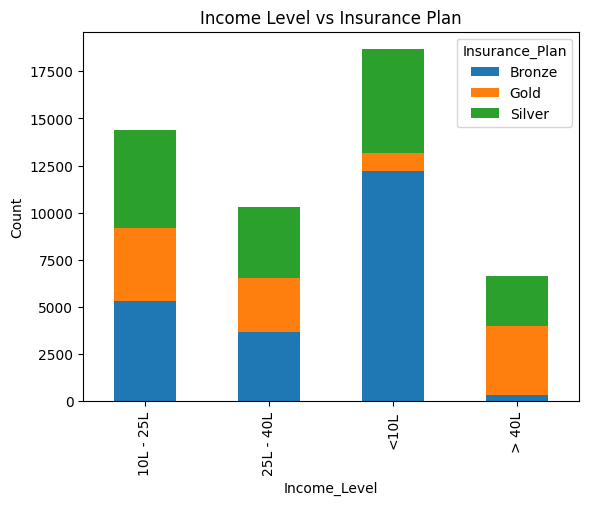

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# Correcting the crosstab
crosstab = pd.crosstab(df2['Income_Level'], df2['Insurance_Plan'])  # Separate columns as arguments
print(crosstab)

# Plotting the stacked bar chart
crosstab.plot(kind="bar", stacked=True)
plt.title('Income Level vs Insurance Plan')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Insurance_Plan', ylabel='Income_Level'>

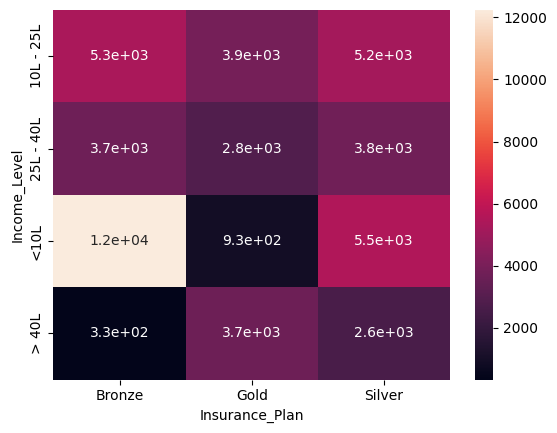

In [80]:
sns.heatmap(crosstab, annot=True)

In [81]:
df2.head(2)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339


In [82]:
df2.Medical History.unique()

SyntaxError: invalid syntax (1595234622.py, line 1)

In [83]:
df2.rename(columns={'Medical History': 'Medical_History'}, inplace=True)

In [84]:
df2.rename(columns={'Medical History': 'Medical_History'}, inplace=True)

In [85]:
df2.Medical_History.unique()

array(['Diabetes', 'High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Thyroid', 'Heart disease',
       'High blood pressure & Heart disease', 'Diabetes & Thyroid',
       'Diabetes & Heart disease'], dtype=object)

In [87]:
risk_scores = {
    "diabetes": 6, 
    "heart disease": 8, 
    "high blood pressure": 6, 
    "thyroid": 5, 
    "no disease": 0, 
    "none": 0
} 

df['Medical_History'].str.split(" & ", expand=True).apply(lambda x: x.str.lower())

KeyError: 'Medical_History'

In [88]:
import pandas as pd

# Sample DataFrame for demonstration
data = {
    'Medical_History': ['Diabetes & High Blood Pressure', 'Heart Disease', 'No Disease', 'Thyroid & None']
}
df = pd.DataFrame(data)

# Splitting the Medical_History column and converting to lowercase
split_medical_history = df['Medical_History'].str.split(" & ", expand=True).apply(lambda x: x.str.lower())

# Optionally, you can assign the split columns back to the original DataFrame
# For example, if you want to keep the split columns
df[['Medical_History_1', 'Medical_History_2']] = split_medical_history

print(df)

                  Medical_History Medical_History_1    Medical_History_2
0  Diabetes & High Blood Pressure          diabetes  high blood pressure
1                   Heart Disease     heart disease                 None
2                      No Disease        no disease                 None
3                  Thyroid & None           thyroid                 none


In [89]:
risk_scores = {
    "diabetes": 6, 
    "heart disease": 8, 
    "high blood pressure": 6, 
    "thyroid": 5, 
    "no disease": 0, 
    "none": 0
} 

df['Medical_History'].str.split(" & ", expand=True).apply(lambda x: x.str.lower())

,0,1
0,diabetes,high blood pressure
1,heart disease,None
2,no disease,None
3,thyroid,none


NameError: name 'categorical_cols' is not defined

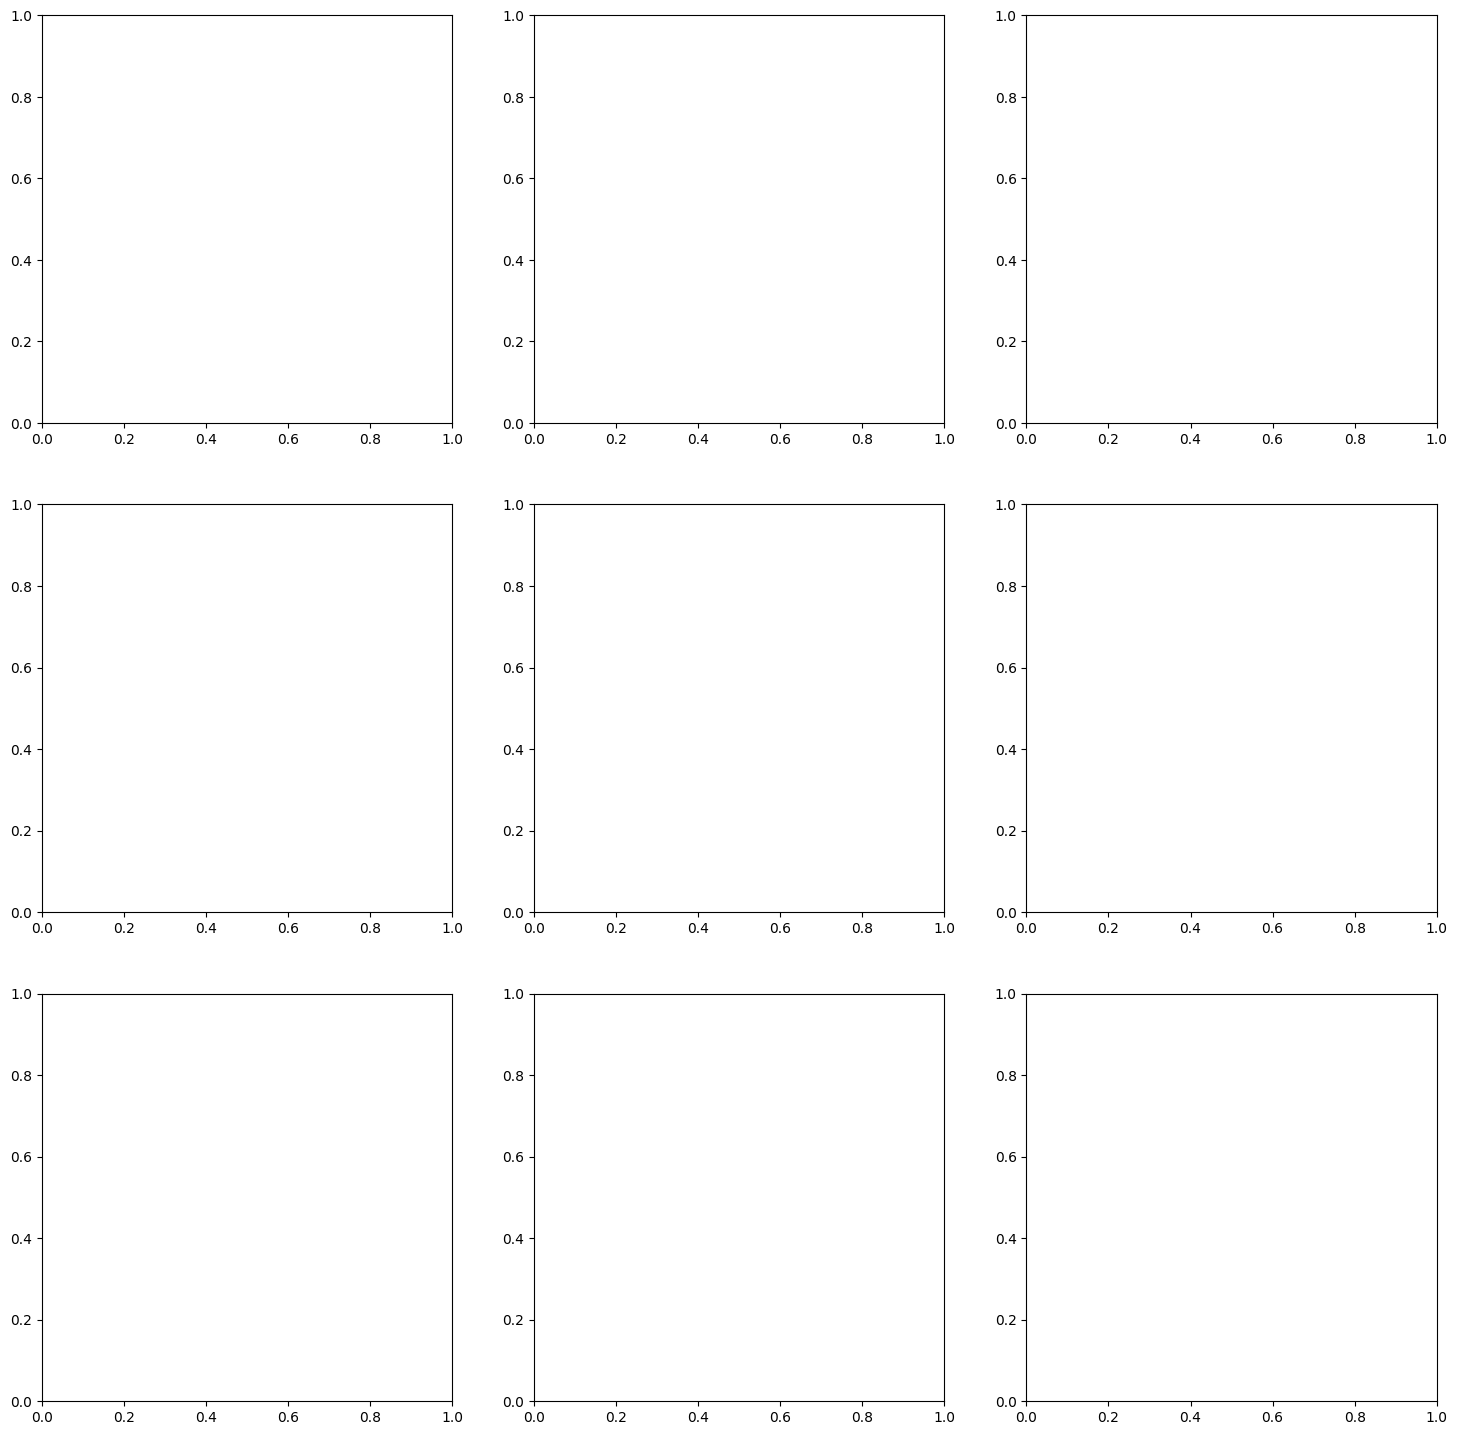

In [90]:
fig, axes = plt.subplots(3, 3, figsize=(18, 18))  # Adjust figure size as necessary
axes = axes.flatten()  # Flatten the 2D array of axes into 1D for easier iteration

for ax, column in zip(axes, categorical_cols):
    # Calculate the percentage distribution of each category
    category_counts = df2[column].value_counts(normalize=True) * 100  # normalize=True gives the relative frequencies
    
    # Plotting the distribution using barplot
    sns.barplot(x=category_counts.index, y=category_counts.values, ax=ax)
    ax.set_title(f'Percentage Distribution of {column}')
    ax.set_ylabel('Percentage of Policyholders (%)')
    ax.set_xlabel(column)  # Set xlabel to the column name for clarity

plt.tight_layout()  # Adjusts plot parameters for better fit in the figure window
plt.show()

In [91]:
df2.head(2)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical_History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339


In [93]:
risk_scores = {
    "diabetes": 6,
    "heart disease": 8,
    "high blood pressure":6,
    "thyroid": 5,
    "no disease": 0,
    "none":0
}

df2[['disease1', 'disease2']] = df2['Medical_History'].str.split(" & ", expand=True).apply(lambda x: x.str.lower())
df2['disease1'].fillna('none', inplace=True)
df2['disease2'].fillna('none', inplace=True)
df2['total_risk_score'] = 0

for disease in ['disease1', 'disease2']:
    df2['total_risk_score'] += df2[disease].map(risk_scores)

# Normalize the risk score to a range of 0 to 1
max_score = df2['total_risk_score'].max()
min_score = df2['total_risk_score'].min()
df2['normalized_risk_score'] = (df2['total_risk_score'] - min_score) / (max_score - min_score)
df2.head(2)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical_History,Insurance_Plan,Annual_Premium_Amount,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,diabetes,none,6,0.428571


In [95]:
df2['Insurance_Plan'] = df2['Insurance_Plan'].map({'Bronze': 1, 'Silver': 2, 'Gold': 3})

In [97]:
df2['Income_Level'] = df2['Income_Level'].map({'<10L':1, '10L-25L' :2, '25L-40L' :3, '> 40L':4})

In [100]:
nominal_cols = ['Gender', 'Region', 'Marital_status', 'BMI_Category', 'Smoking_Status', 'Employment_Status']
df3 = pd.get_dummies(df2, columns=nominal_cols, drop_first=True, dtype=int)
df3.head(3)

,Age,Number Of Dependants,Income_Level,Income_Lakhs,Medical_History,Insurance_Plan,Annual_Premium_Amount,disease1,disease2,total_risk_score,...,Region_Southeast,Region_Southwest,Marital_status_Unmarried,BMI_Category_Obesity,BMI_Category_Overweight,BMI_Category_Underweight,Smoking_Status_Occasional,Smoking_Status_Regular,Employment_Status_Salaried,Employment_Status_Self-Employed
0,26,0,1.0,6,Diabetes,1,9053,diabetes,none,6,...,0,0,1,0,0,0,0,0,1,0
1,29,2,1.0,6,Diabetes,1,16339,diabetes,none,6,...,1,0,0,1,0,0,0,1,1,0
2,49,2,NaN,20,High blood pressure,2,18164,high blood pressure,none,6,...,0,0,0,0,0,0,0,0,0,1


In [101]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              50000 non-null  int64  
 1   Number Of Dependants             50000 non-null  int64  
 2   Income_Level                     25308 non-null  float64
 3   Income_Lakhs                     50000 non-null  int64  
 4   Medical_History                  50000 non-null  object 
 5   Insurance_Plan                   50000 non-null  int64  
 6   Annual_Premium_Amount            50000 non-null  int64  
 7   disease1                         50000 non-null  object 
 8   disease2                         50000 non-null  object 
 9   total_risk_score                 50000 non-null  int64  
 10  normalized_risk_score            50000 non-null  float64
 11  Gender_Male                      50000 non-null  int32  
 12  Region_Northwest  

In [102]:
df4 = df3.drop(['Medical_History', 'disease1', 'disease2', 'total_risk_score'], axis=1)
df4.head(3)

,Age,Number Of Dependants,Income_Level,Income_Lakhs,Insurance_Plan,Annual_Premium_Amount,normalized_risk_score,Gender_Male,Region_Northwest,Region_Southeast,Region_Southwest,Marital_status_Unmarried,BMI_Category_Obesity,BMI_Category_Overweight,BMI_Category_Underweight,Smoking_Status_Occasional,Smoking_Status_Regular,Employment_Status_Salaried,Employment_Status_Self-Employed
0,26,0,1.0,6,1,9053,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1.0,6,1,16339,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,49,2,NaN,20,2,18164,0.428571,0,0,0,0,0,0,0,0,0,0,0,1


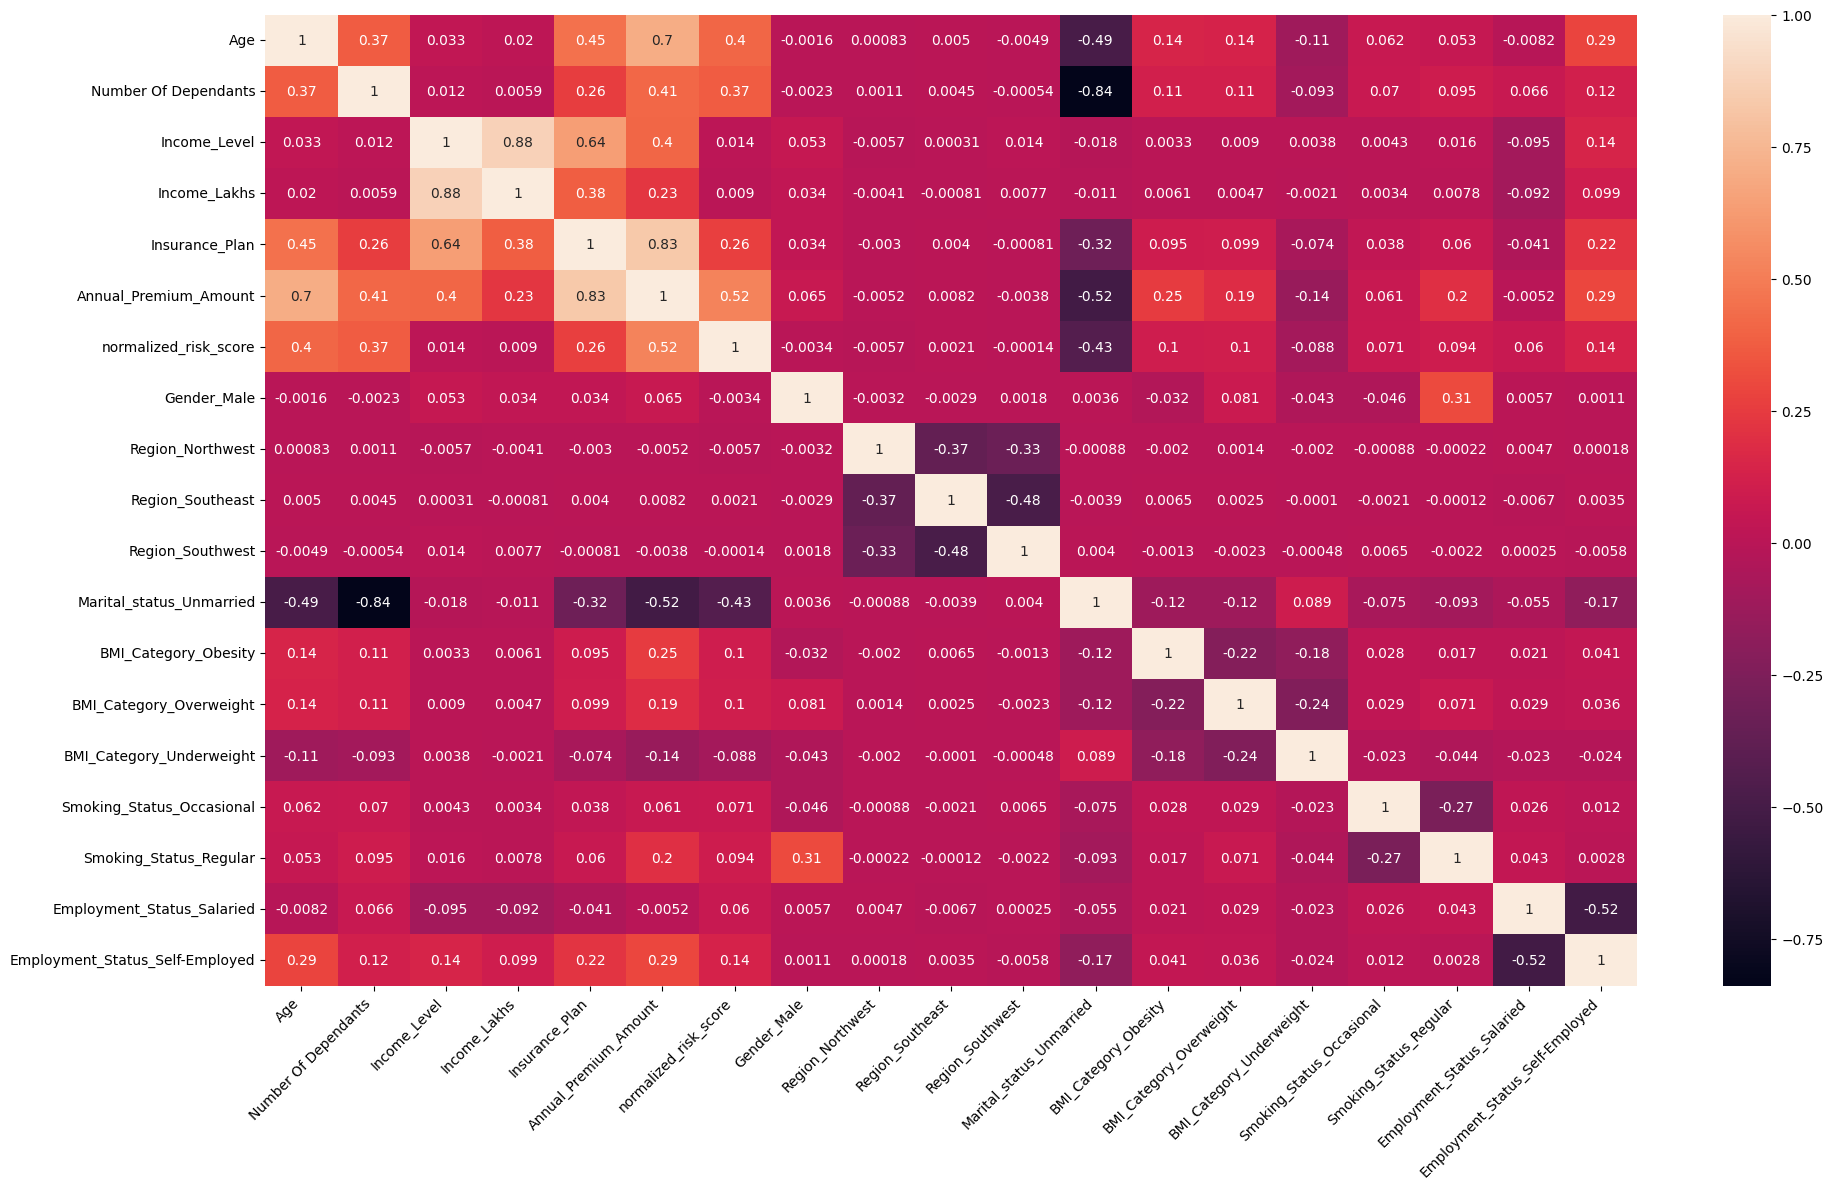

In [103]:
cm = df4.corr()

plt.figure(figsize=(20,12))
sns.heatmap(cm, annot=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [107]:
X = df4.drop('Annual_Premium_Amount', axis='columns')
y = df4['Annual_Premium_Amount'] 

from sklearn.preprocessing import MinMaxScaler 

cols_to_scale = ['Age', 'Number Of Dependants', 'Income_Level', 'Income_Lakhs', 'Insurance_Plan']
scaler = MinMaxScaler()

X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
X.describe()

,Age,Number Of Dependants,Income_Level,Income_Lakhs,Insurance_Plan,normalized_risk_score,Gender_Male,Region_Northwest,Region_Southeast,Region_Southwest,Marital_status_Unmarried,BMI_Category_Obesity,BMI_Category_Overweight,BMI_Category_Underweight,Smoking_Status_Occasional,Smoking_Status_Regular,Employment_Status_Salaried,Employment_Status_Self-Employed
count,50000.000000,50000.000000,25308.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.049093,0.589010,0.262407,0.023701,0.397560,0.291836,0.549600,0.200880,0.3504,0.303040,0.513620,0.143300,0.231120,0.155360,0.138300,0.313720,0.419360,0.272040
std,0.044380,0.187281,0.439951,0.026070,0.392453,0.287436,0.497539,0.400662,0.4771,0.459577,0.499819,0.350382,0.421553,0.362251,0.345218,0.464009,0.493459,0.445015
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.011834,0.375000,0.000000,0.006459,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.038462,0.625000,0.000000,0.017223,0.500000,0.357143,1.000000,0.000000,0.0000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.079882,0.750000,1.000000,0.032293,0.500000,0.428571,1.000000,0.000000,1.0000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [108]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [109]:
calculate_vif(X)

MissingDataError: exog contains inf or nans

In [110]:
calculate_vif(X)

MissingDataError: exog contains inf or nans

In [111]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [112]:
calculate_vif(X)

MissingDataError: exog contains inf or nans

In [113]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    # Remove rows with NaN or inf values
    data_cleaned = data.replace([np.inf, -np.inf], np.nan).dropna()

    # Create a DataFrame to store VIF values
    vif_df = pd.DataFrame()
    vif_df['Column'] = data_cleaned.columns
    vif_df['VIF'] = [variance_inflation_factor(data_cleaned.values, i) for i in range(data_cleaned.shape[1])]
    return vif_df

# Example DataFrame
data = {
    'X1': [1, 2, 3, 4, 5],
    'X2': [5, 6, 7, np.nan, 9],  # Contains NaN
    'X3': [2, 3, 4, 5, np.inf]    # Contains inf
}

df = pd.DataFrame(data)

# Calculate VIF
vif_result = calculate_vif(df)
print(vif_result)

  Column  VIF
0     X1  inf
1     X2  inf
2     X3  inf


C:\Users\kaush\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [114]:
calculate_vif(X.drop('income_level', axis="columns"))

KeyError: "['income_level'] not found in axis"

In [115]:
X_reduced = X.drop('Income_Level', axis="columns")

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.30, random_state=10)

# shape of the X_train, X_test, y_train, y_test features
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (35000, 17)
x test:  (15000, 17)
y train:  (35000,)
y test:  (15000,)


In [119]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.30, random_state=10)

print("x train: ", X_train.shape)
print("x test: ", X_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

x train:  (35000, 17)
x test:  (15000, 17)
y train:  (35000,)
y test:  (15000,)


In [120]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
test_score = model_lr.score(X_test, y_test)
train_score = model_lr.score(X_train, y_train)
train_score, test_score

(0.9128812362015056, 0.9096697631846299)

In [121]:
y_pred = model_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred) 
rmse_lr = np.sqrt(mse_lr) 
print("Linear Regression ==> MSE: ", mse_lr, "RMSE: ", rmse_lr)

Linear Regression ==> MSE:  6332861.764685062 RMSE:  2516.517785489517


In [122]:
X_test.shape

(15000, 17)

In [123]:
np.set_printoptions(suppress=True, precision=6)
model_lr.coef_

array([50626.274272, -1429.665585, -7146.384796, 13237.794425,
        5298.32473 ,   126.733323,   -29.909511,    19.204863,
         -24.462154, -1515.094309,  3533.725446,  1735.651698,
         332.201174,   689.225783,  2187.040956,   257.617743,
         737.550085])

In [125]:
feature_importance = model_lr.coef_

coef_df = pd.DataFrame(feature_importance, index=X_train.columns, columns=['Coefficients'])

coef_df = coef_df.sort_values(by='Coefficients, ascending=True')

plt.figure(figsize=(8,4))
plt.barh(coef_df.index, coef_df['Coeficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Linear Regression')
plt.show()

KeyError: 'Coefficients, ascending=True'

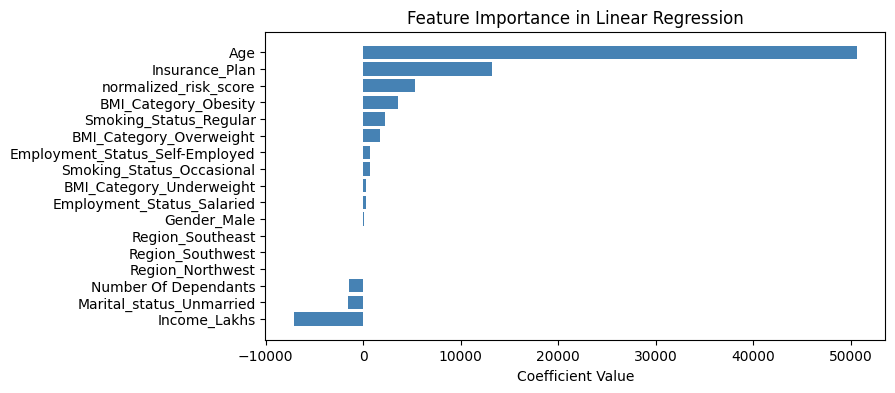

In [126]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming model_lr is your fitted linear regression model and X_train is your feature set
feature_importance = model_lr.coef_

# Create a DataFrame for the coefficients
coef_df = pd.DataFrame(feature_importance, index=X_train.columns, columns=['Coefficients'])

# Correcting the sorting by ensuring the column name is correct
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting the coefficients
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')  # Corrected 'Coeficients' to 'Coefficients'
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Linear Regression')
plt.show()

In [129]:
from xgboost import XGBRegressor  
model_xgb = XGBRegressor(n_estimators=20, max_depth=3)
model_xgb.fit(X_train, y_train)
model_xgb.score(X_test, y_test)

0.9766580114268135

In [130]:
y_pred = model_xgb.predict(X_test) 

mse_lr = mean_squared_error(y_test, y_pred) 
rmse = np.sqrt(mse_lr) 
print("XGBoost Regression", mse_lr, "RMSE: ", rmse_lr)

XGBoost Regression 1636457.4273062884 RMSE:  2516.517785489517


In [131]:
model_xgb = XGBRegressor()
param_grid = {
    'n_estimators': [20, 40, 50], 
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
} 

random_search = RandomizedSearchCV(model_xgb, param_grid, n_iter=10, cv=3, scoring='r2', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)
random_search.best_score_

0.9808107302315955

In [132]:
random_search.best_params_

{'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}

In [133]:
best_model = random_search.best_estimator_

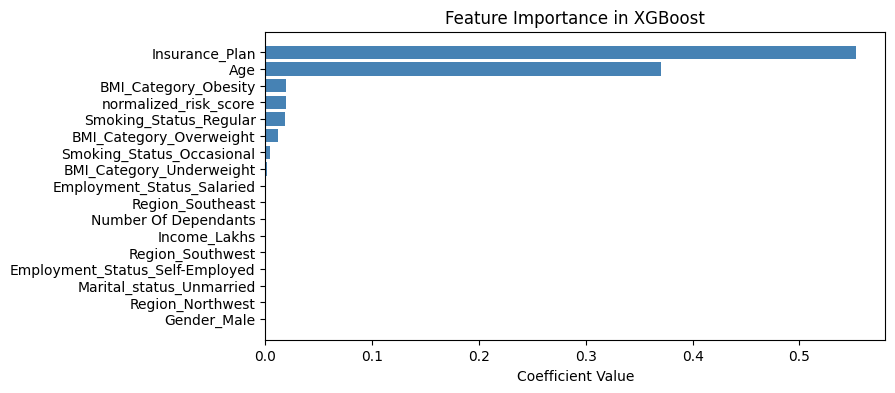

In [136]:
feature_importance = best_model.feature_importances_ 

coef_df = pd.DataFrame(feature_importance, index=X_train.columns, columns=['Coefficients'])
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

plt.figure(figsize=(8,4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in XGBoost')
plt.show()

In [138]:
y_pred = best.model.predict(X_test) 
residuals = y_pred - y_test
residuals_pct = (residuals/y_test) *`100 

results_df = pd.DataFrame({
    'actual': y_test, 
    'predicted': y_pred,
    'diff': residuals, 
    'diff_pct': residuals_pct
}) 
results_df.head()

SyntaxError: invalid syntax (3203374563.py, line 3)

In [139]:
y_pred = best_model.predict(X_test)

residuals = y_pred - y_test
residuals_pct = (residuals / y_test) * 100

results_df = pd.DataFrame({
    'actual': y_test, 
    'predicted': y_pred, 
    'diff': residuals, 
    'diff_pct': residuals_pct
})
results_df.head()

,actual,predicted,diff,diff_pct
27632,19672,19590.441406,-81.558594,-0.414592
36119,26972,26779.802734,-192.197266,-0.712581
4796,26371,26811.457031,440.457031,1.670233
3648,9481,6921.030273,-2559.969727,-27.001052
24501,4788,6668.674805,1880.674805,39.278922


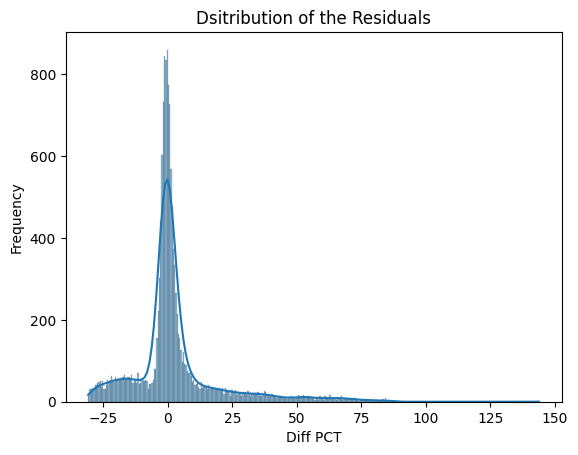

In [140]:
sns.histplot(results_df['diff_pct'], kde=True)
plt.title('Dsitribution of the Residuals')
plt.xlabel('Diff PCT')
plt.ylabel('Frequency')
plt.show()

In [141]:
X_test.shape

(15000, 17)

In [142]:
extreme_error_threshold = 10 
extreme_results_df = results_df[np.abs(results_df['diff_pct']) > extreme_error_threshold] 
extreme_results_df.head()

,actual,predicted,diff,diff_pct
3648,9481,6921.030273,-2559.969727,-27.001052
24501,4788,6668.674805,1880.674805,39.278922
21255,17271,14442.130859,-2828.869141,-16.379301
14324,7890,6878.543945,-1011.456055,-12.819468
12496,4429,7025.699707,2596.699707,58.629481


In [144]:
extreme_results_df.shape 

(4476, 4)

In [145]:
extreme_errors_pct = extreme_results_df.shape[0]*100/X_test.shape[0] 
extreme_errors_pct

29.84

In [146]:
extreme_results_df[abs(extreme_results_df.diff_pct)>50].sort_values("diff_pct", ascending=False)

,actual,predicted,diff,diff_pct
47192,5343,13030.453125,7687.453125,143.878965
29904,3503,6584.773438,3081.773438,87.975262
46118,3508,6584.773438,3076.773438,87.707339
18094,3505,6566.392578,3061.392578,87.343583
7988,3527,6584.773438,3057.773438,86.696156
...,...,...,...,...
14957,4419,6650.293945,2231.293945,50.493187
46796,4601,6921.030273,2320.030273,50.424479
12047,4807,7227.396973,2420.396973,50.351508
46644,4849,7275.397461,2426.397461,50.039131


In [147]:
extreme_errors_df = X_test.loc[extreme_results_df.index] 
extreme_errors_df.head(2)

,Age,Number Of Dependants,Income_Lakhs,Insurance_Plan,normalized_risk_score,Gender_Male,Region_Northwest,Region_Southeast,Region_Southwest,Marital_status_Unmarried,BMI_Category_Obesity,BMI_Category_Overweight,BMI_Category_Underweight,Smoking_Status_Occasional,Smoking_Status_Regular,Employment_Status_Salaried,Employment_Status_Self-Employed
3648,0.002959,0.5,0.017223,0.0,0.428571,1,0,1,0,1,0,0,0,0,0,0,0
24501,0.020710,0.5,0.023681,0.0,0.000000,0,0,1,0,1,0,0,1,0,0,0,0


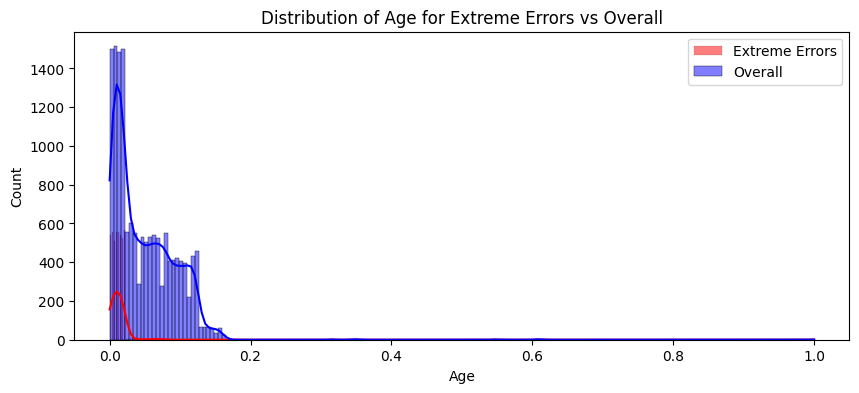

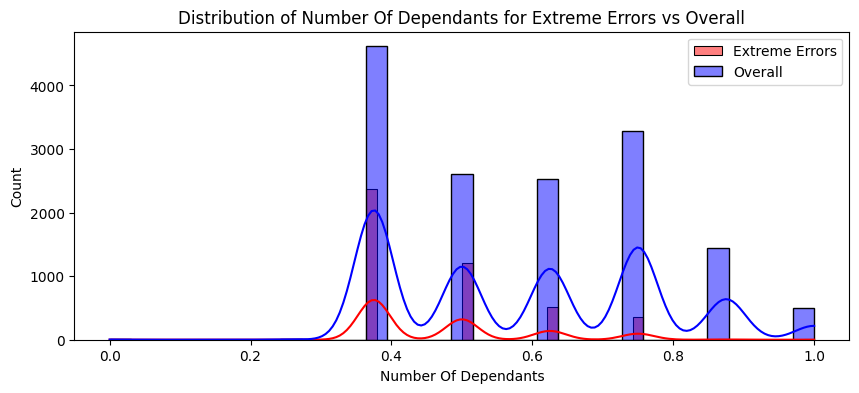

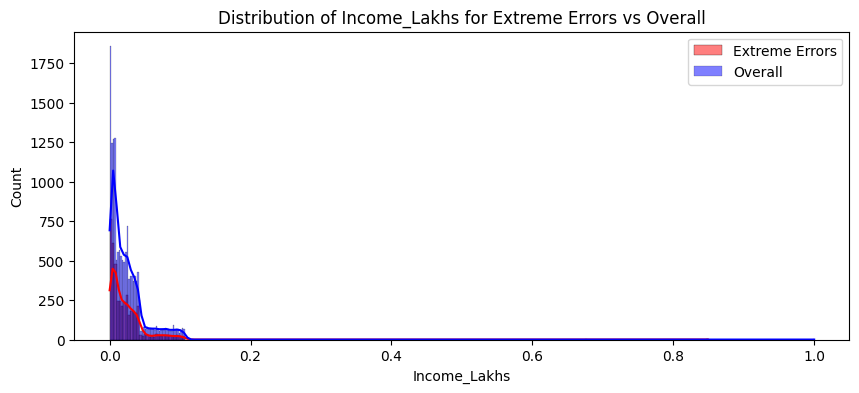

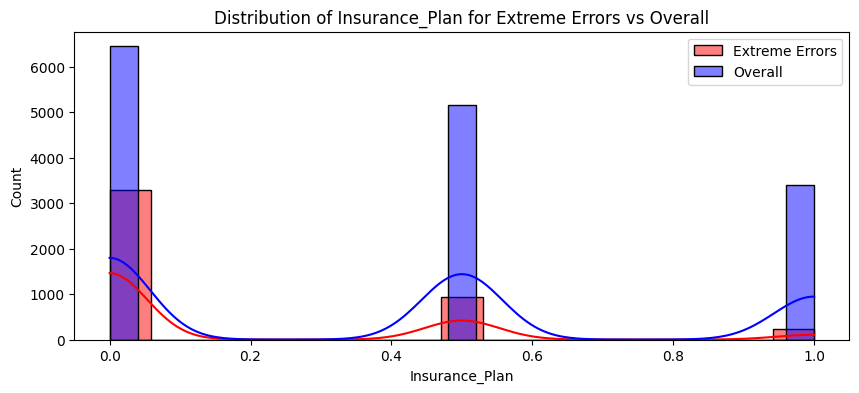

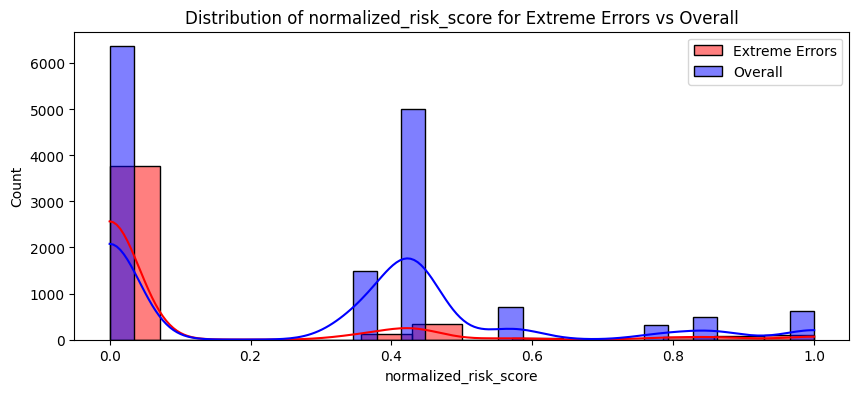

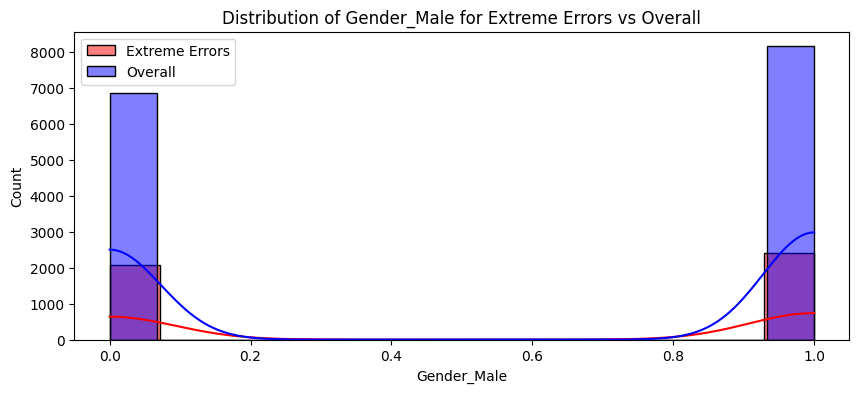

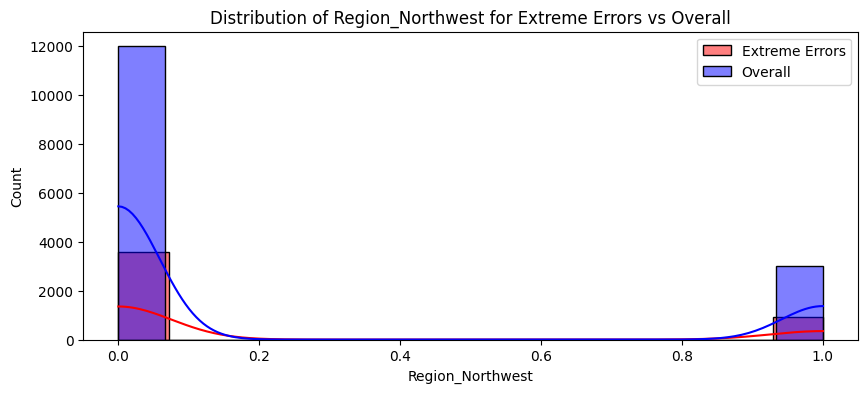

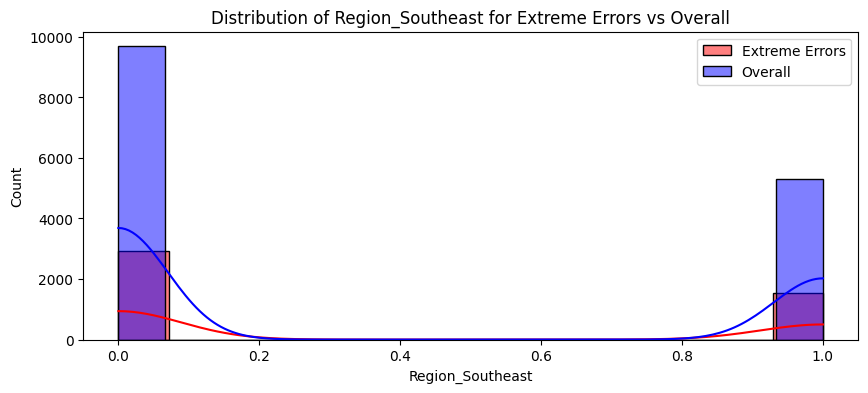

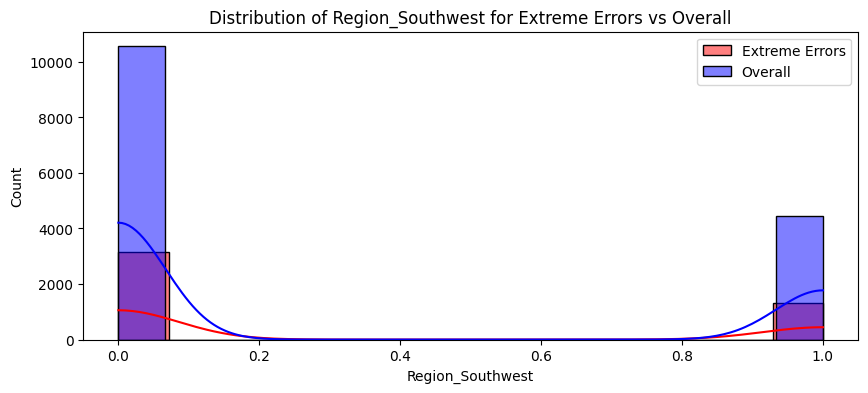

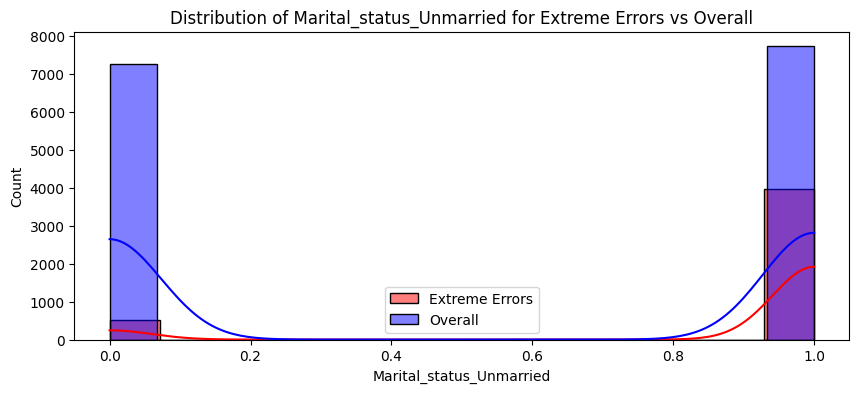

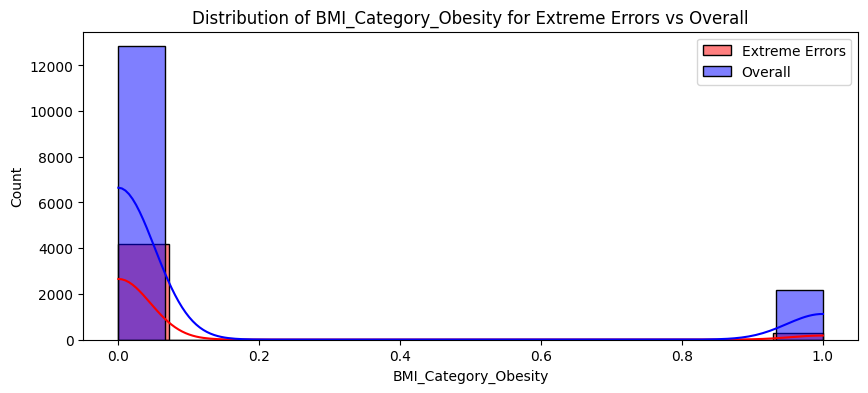

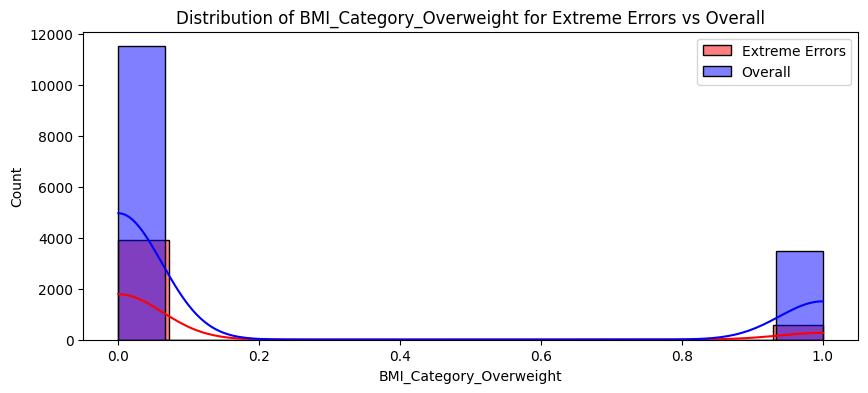

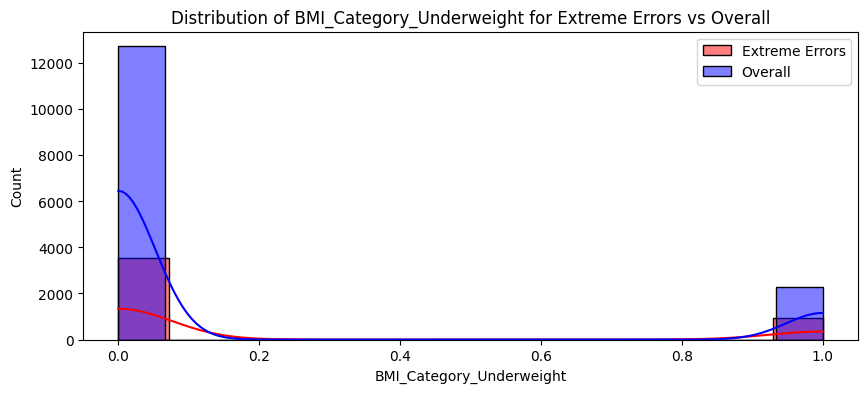

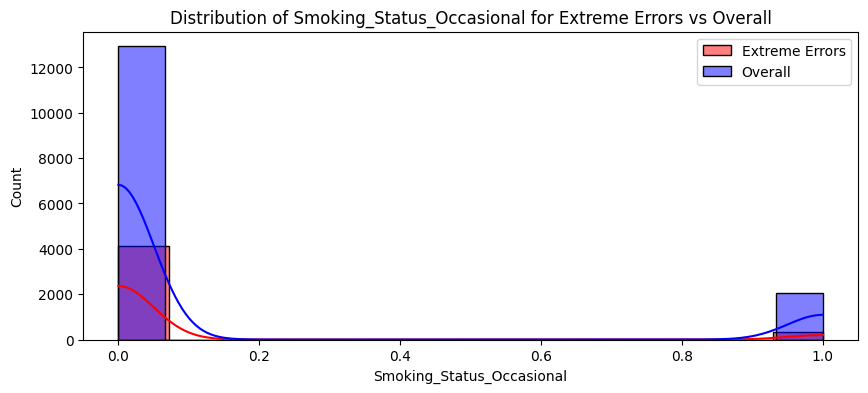

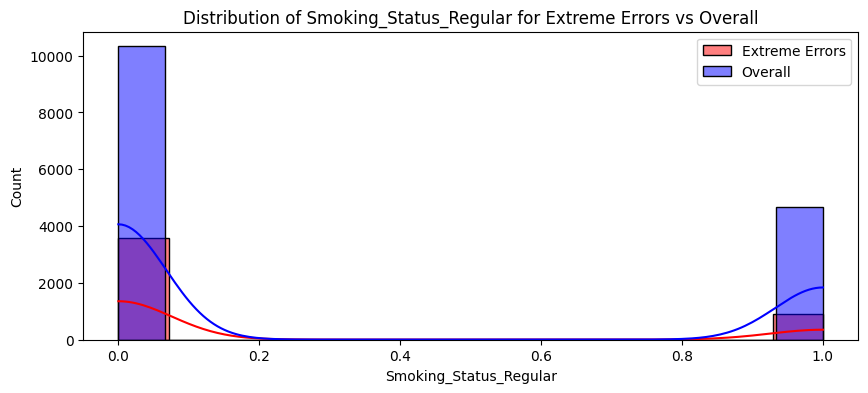

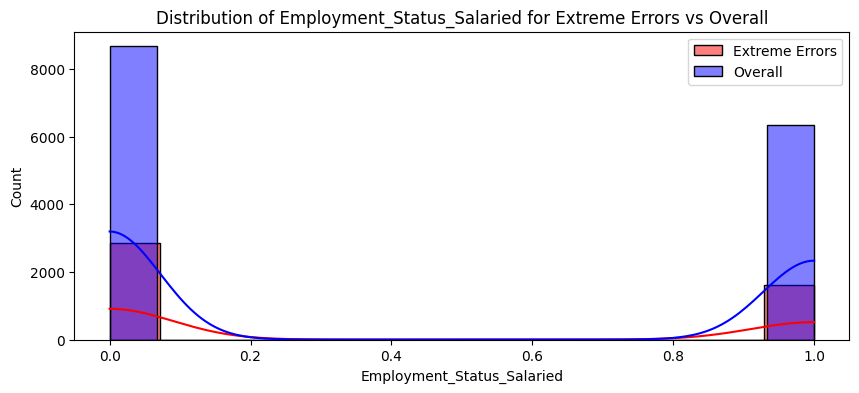

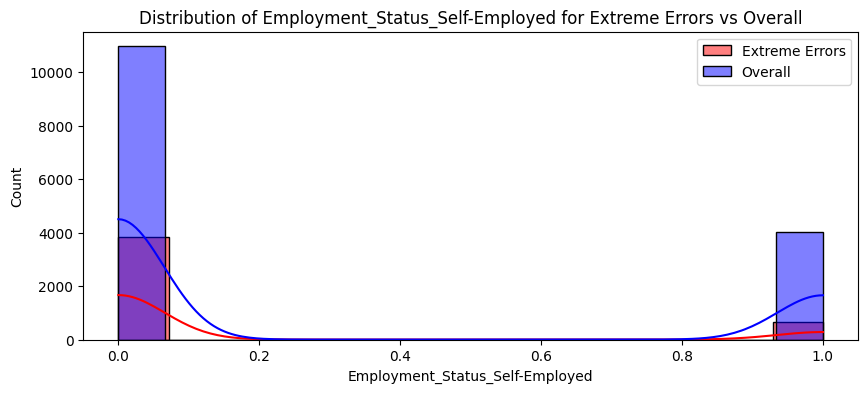

In [148]:
for feature  in X_test.columns: 
    plt.figure(figsize=(10,4))
    sns.histplot(extreme_errors_df[feature], color='red', label='Extreme Errors', kde=True)
    sns.histplot(X_test[feature], color='blue', label='Overall', alpha=0.5, kde=True)
    plt.legend()
    plt.title(f'Distribution of {feature} for Extreme Errors vs Overall')
    plt.show()

In [149]:
extreme_errors_df['income_level']=-1 

In [150]:
df_reversed = pd.DataFrame()
df_reversed[cols_to_scale] = scaler.inverse_transform(extreme_erros_df[cols_to_scale])
df_reversed.head()

NameError: name 'extreme_erros_df' is not defined

In [151]:
df_reversed = pd.DataFrame()
df_reversed[cols_to_scale] = scaler.inverse_transform(extreme_errors_df[cols_to_scale])
df_reversed.head()

KeyError: "['Income_Level'] not in index"

In [1]:
import streamlit as st
if st.button("predict"):
    print("predict clicked") 

2024-10-02 18:36:17.257 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-02 18:36:17.258 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-02 18:36:17.259 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-02 18:36:17.261 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-02 18:36:18.210 
  command:

    streamlit run C:\Users\kaush\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-10-02 18:36:18.211 Thread 'MainThread': missing ScriptRunContext! This